## GRIP-The Sparks Foundation

### Author : S.Shivani

### Task 1 :  Prediction Using Supervised Machine Learning

###  Objective: To predict percentage of a student based on  no. of study hours
#### Method Adopted-Simple Linear Regression

In [145]:
## Importing necessary library packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
## reading data from a remote link

df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

## To read the first five elements
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [147]:
## To check if there are any null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [148]:
##Shape of dataset
df.shape

(25, 2)

In [149]:
## Summary of Dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


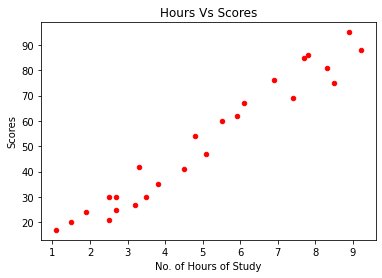

In [150]:
### Visualising the Dataset using Scatter plot

df.plot.scatter(x='Hours',y='Scores',color='red')
plt.xlabel('No. of Hours of Study')
plt.ylabel('Scores')
plt.title('Hours Vs Scores')
plt.show()

We observe that there is a positive linear relationship between the two variables i.e. the hours of study and the scores of the student.\
So according to the graph, we can say that as the no. of study hours increases the score of the student also increases

In [158]:
### Selecting the variables i.e. the Attribute(independent variable) and Labels(dependent variable)

X= df.iloc[: , 0:1].values
Y= df.iloc[: , 1].values

In [214]:
## Splitting the dataset into Train and Test Data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [215]:
### Training the algorithm
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
print('Training Completed')

Training Completed


In [216]:
## Intercept and Coefficient of the SLR model

print('The Intercept is : ', regr.intercept_)
print('The Coefficient is : ', regr.coef_)

The Intercept is :  1.932204253151646
The Coefficient is :  [9.94167834]


SLR equation is of the form : y=mx+c \
Therefore, the equation for this model is: y =9.94167834 * x + 1.93220425

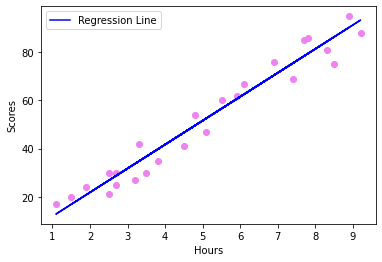

In [217]:
## Plotting the regression line
regr_line=regr.coef_*X+regr.intercept_

## Plotting for test data
plt.scatter(X,Y,color='violet')
plt.plot(X,regr_line,color='blue',label='Regression Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [218]:
## To print the Predicted values

Y_predicted = regr.predict(X_test)
print(Y_predicted)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [219]:
## Comparision between the Actual and Predicted Values

ActualVsPred = pd.DataFrame({'Actual':Y_test,'Predicted':Y_predicted})
ActualVsPred

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


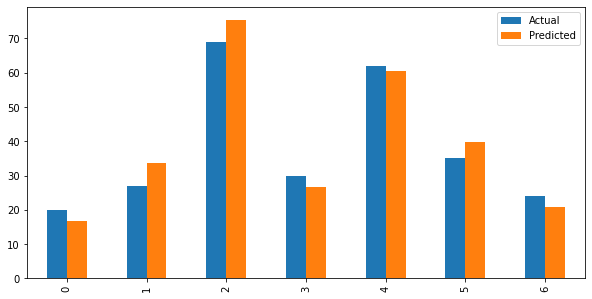

In [220]:
ActualVsPred.plot(kind='bar',figsize=(10,5))

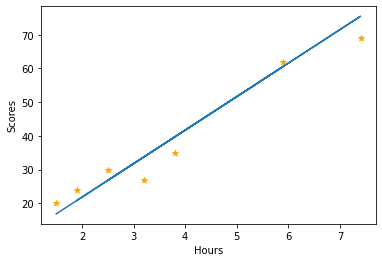

In [221]:
plt.scatter(X_test,Y_test,color='orange',marker='*')
plt.plot(X_test,Y_predicted)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [225]:
## To predict the Score/Precentage when a student studies for 9.25 hours

hours= [[9.25]]
pred=regr.predict(hours)
print("No of Hours = ", hours[0][0])
print("Predicted Score = ", pred[0])

No of Hours =  9.25
Predicted Score =  93.89272889341655


In [222]:
## Metrics Calculation
## Model Evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))
print('R2 Score is: ',metrics.r2_score(Y_test,Y_predicted))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055
R2 Score is:  0.9367661043365055


##### Conclusions:
###### 1. As the Coefficient of determination i.e.R2 score is approximately 94% our linear model is a good fit for the data
###### 2. The Score when a student studies for 9.25 hours is approx. 93.89